In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils.extmath import softmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src.supervised_NDL.SMF_BCD import SDL_BCD
from src.supervised_NDL.SMF_torch import smf

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.values  ### Uncomment this line if you are having type errors in plotting. It is loading as a pandas dataframe, but our indexing is for numpy array. 
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [3]:
### Change the dimension of y for SMF_BCD
y_matrix = np.zeros((9, y.shape[0]))
for i in range(y.shape[0]):
    label = int(y[i])
    if label == 0:
        continue
    else:
        y_matrix[label-1, i] = 1

print(y_matrix.shape)

### Scale the input data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X= scaler.transform(X)

print(X.shape)

(9, 70000)
(70000, 784)


In [140]:
n_components = 9

SMF_Train = SDL_BCD([X.T, y_matrix], X_test=[X.T, y_matrix], xi= 5, n_components=n_components)

results_dict = SMF_Train.fit(iter=500, subsample_size=None,# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=False, if_validate=True, threshold=0.5)

initial loading beta [[-0.80263181 -0.49641904  0.40949146  0.05698833 -0.44201046 -0.42456221
  -0.21738016 -0.60117526 -0.34391603  0.17479772]
 [ 0.64733704 -0.17296089 -0.93886162  0.72842063 -0.95173731  0.00991331
  -0.61023553  0.57575912 -0.92063741  0.77367286]
 [-0.63942687  0.14686049 -0.83343806  0.15413988  0.10901648 -0.18779109
  -0.78773807 -0.34196301 -0.5643075   0.35548123]
 [ 0.59712973 -0.80203819 -0.86595274 -0.80445764 -0.63921068  0.39241181
  -0.62191927 -0.59568834  0.88647387  0.1409312 ]
 [ 0.57301077  0.51396858 -0.3759117  -0.32824874  0.11803537 -0.66313775
   0.11718623 -0.76191735  0.33437001  0.60514149]
 [-0.85429628  0.96283845  0.03822079 -0.77900977 -0.57621386  0.09312963
   0.18331009  0.96366797 -0.11220267  0.72522171]
 [-0.33084928 -0.83893522 -0.43538184 -0.60437025  0.77706316  0.18052408
   0.61347917 -0.25228484  0.33277246  0.25714535]
 [-0.90699083  0.64483849 -0.86124653 -0.16740881  0.3122645   0.10452134
   0.25499949  0.42130196  0.3

  2%|▏         | 10/500 [00:26<23:13,  2.84s/it]

!!! pred_type filter


  2%|▏         | 11/500 [00:30<25:29,  3.13s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558112,   8791],
       [ 32237,  30860]]), 0.935]


  4%|▍         | 20/500 [00:54<20:39,  2.58s/it]

!!! pred_type filter


  4%|▍         | 21/500 [00:57<21:48,  2.73s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557843,   9060],
       [ 26797,  36300]]), 0.943]


  6%|▌         | 30/500 [01:19<20:05,  2.57s/it]

!!! pred_type filter


  6%|▌         | 31/500 [01:22<21:22,  2.74s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557836,   9067],
       [ 24592,  38505]]), 0.947]


  8%|▊         | 40/500 [01:46<19:19,  2.52s/it]

!!! pred_type filter


  8%|▊         | 41/500 [01:49<20:28,  2.68s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557822,   9081],
       [ 23538,  39559]]), 0.948]


 10%|█         | 50/500 [02:11<18:46,  2.50s/it]

!!! pred_type filter


 10%|█         | 51/500 [02:14<19:49,  2.65s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557846,   9057],
       [ 22771,  40326]]), 0.949]


 12%|█▏        | 60/500 [02:37<18:42,  2.55s/it]

!!! pred_type filter


 12%|█▏        | 61/500 [02:40<19:53,  2.72s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557909,   8994],
       [ 22350,  40747]]), 0.95]


 14%|█▍        | 70/500 [03:03<18:45,  2.62s/it]

!!! pred_type filter


 14%|█▍        | 71/500 [03:07<19:59,  2.80s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557922,   8981],
       [ 22042,  41055]]), 0.951]


 16%|█▌        | 80/500 [03:31<19:59,  2.86s/it]

!!! pred_type filter


 16%|█▌        | 81/500 [03:35<20:34,  2.95s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557982,   8921],
       [ 21761,  41336]]), 0.951]


 18%|█▊        | 90/500 [04:00<18:47,  2.75s/it]

!!! pred_type filter


 18%|█▊        | 91/500 [04:04<19:55,  2.92s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557976,   8927],
       [ 21648,  41449]]), 0.951]


 20%|██        | 100/500 [04:29<18:50,  2.83s/it]

!!! pred_type filter


 20%|██        | 101/500 [04:33<20:06,  3.02s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557987,   8916],
       [ 21496,  41601]]), 0.952]


 22%|██▏       | 110/500 [04:55<15:52,  2.44s/it]

!!! pred_type filter


 22%|██▏       | 111/500 [04:58<17:00,  2.62s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558003,   8900],
       [ 21380,  41717]]), 0.952]


 24%|██▍       | 120/500 [05:22<16:14,  2.56s/it]

!!! pred_type filter


 24%|██▍       | 121/500 [05:24<16:35,  2.63s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558013,   8890],
       [ 21271,  41826]]), 0.952]


 26%|██▌       | 130/500 [05:47<15:22,  2.49s/it]

!!! pred_type filter


 26%|██▌       | 131/500 [05:50<16:27,  2.68s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558028,   8875],
       [ 21190,  41907]]), 0.952]


 28%|██▊       | 140/500 [06:13<15:13,  2.54s/it]

!!! pred_type filter


 28%|██▊       | 141/500 [06:16<16:19,  2.73s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558089,   8814],
       [ 21113,  41984]]), 0.952]


 30%|███       | 150/500 [06:37<14:10,  2.43s/it]

!!! pred_type filter


 30%|███       | 151/500 [06:41<15:35,  2.68s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558095,   8808],
       [ 21034,  42063]]), 0.953]


 32%|███▏      | 160/500 [07:03<14:03,  2.48s/it]

!!! pred_type filter


 32%|███▏      | 161/500 [07:06<15:03,  2.67s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558104,   8799],
       [ 20959,  42138]]), 0.953]


 34%|███▍      | 170/500 [07:29<14:20,  2.61s/it]

!!! pred_type filter


 34%|███▍      | 171/500 [07:32<15:08,  2.76s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558127,   8776],
       [ 20969,  42128]]), 0.953]


 36%|███▌      | 180/500 [07:55<13:15,  2.49s/it]

!!! pred_type filter


 36%|███▌      | 181/500 [07:58<13:59,  2.63s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558141,   8762],
       [ 20963,  42134]]), 0.953]


 38%|███▊      | 190/500 [08:19<12:30,  2.42s/it]

!!! pred_type filter


 38%|███▊      | 191/500 [08:22<13:15,  2.57s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558141,   8762],
       [ 20973,  42124]]), 0.953]


 40%|████      | 200/500 [08:46<13:22,  2.68s/it]

!!! pred_type filter


 40%|████      | 201/500 [08:49<14:41,  2.95s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558141,   8762],
       [ 20986,  42111]]), 0.953]


 42%|████▏     | 210/500 [09:10<11:14,  2.32s/it]

!!! pred_type filter


 42%|████▏     | 211/500 [09:13<12:10,  2.53s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558125,   8778],
       [ 21033,  42064]]), 0.953]


 44%|████▍     | 220/500 [09:34<10:44,  2.30s/it]

!!! pred_type filter


 44%|████▍     | 221/500 [09:36<11:25,  2.46s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558128,   8775],
       [ 21056,  42041]]), 0.953]


 46%|████▌     | 230/500 [10:02<12:15,  2.72s/it]

!!! pred_type filter


 46%|████▌     | 231/500 [10:05<12:43,  2.84s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558094,   8809],
       [ 21077,  42020]]), 0.953]


 48%|████▊     | 240/500 [10:27<10:23,  2.40s/it]

!!! pred_type filter


 48%|████▊     | 241/500 [10:30<10:53,  2.52s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558088,   8815],
       [ 21120,  41977]]), 0.952]


 50%|█████     | 250/500 [10:50<09:17,  2.23s/it]

!!! pred_type filter


 50%|█████     | 251/500 [10:53<09:56,  2.40s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558085,   8818],
       [ 21161,  41936]]), 0.952]


 52%|█████▏    | 260/500 [11:13<08:58,  2.25s/it]

!!! pred_type filter


 52%|█████▏    | 261/500 [11:16<09:45,  2.45s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558067,   8836],
       [ 21204,  41893]]), 0.952]


 54%|█████▍    | 270/500 [11:36<08:17,  2.16s/it]

!!! pred_type filter


 54%|█████▍    | 271/500 [11:39<08:50,  2.32s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558059,   8844],
       [ 21243,  41854]]), 0.952]


 56%|█████▌    | 280/500 [11:58<07:44,  2.11s/it]

!!! pred_type filter


 56%|█████▌    | 281/500 [12:00<08:20,  2.29s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558056,   8847],
       [ 21281,  41816]]), 0.952]


 58%|█████▊    | 290/500 [12:19<07:24,  2.12s/it]

!!! pred_type filter


 58%|█████▊    | 291/500 [12:22<07:54,  2.27s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558063,   8840],
       [ 21309,  41788]]), 0.952]


 60%|██████    | 300/500 [12:41<06:52,  2.06s/it]

!!! pred_type filter


 60%|██████    | 301/500 [12:43<07:31,  2.27s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558045,   8858],
       [ 21371,  41726]]), 0.952]


 62%|██████▏   | 310/500 [13:02<06:39,  2.10s/it]

!!! pred_type filter


 62%|██████▏   | 311/500 [13:05<07:14,  2.30s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[558000,   8903],
       [ 21403,  41694]]), 0.952]


 64%|██████▍   | 320/500 [13:23<06:14,  2.08s/it]

!!! pred_type filter


 64%|██████▍   | 321/500 [13:26<06:46,  2.27s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557972,   8931],
       [ 21453,  41644]]), 0.952]


 66%|██████▌   | 330/500 [13:45<05:57,  2.10s/it]

!!! pred_type filter


 66%|██████▌   | 331/500 [13:48<06:24,  2.27s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557978,   8925],
       [ 21542,  41555]]), 0.952]


 68%|██████▊   | 340/500 [14:06<05:25,  2.03s/it]

!!! pred_type filter


 68%|██████▊   | 341/500 [14:09<05:54,  2.23s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557954,   8949],
       [ 21584,  41513]]), 0.952]


 70%|███████   | 350/500 [14:27<05:04,  2.03s/it]

!!! pred_type filter


 70%|███████   | 351/500 [14:30<05:32,  2.23s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557967,   8936],
       [ 21639,  41458]]), 0.951]


 72%|███████▏  | 360/500 [14:48<04:39,  1.99s/it]

!!! pred_type filter


 72%|███████▏  | 361/500 [14:51<05:02,  2.18s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557953,   8950],
       [ 21687,  41410]]), 0.951]


 74%|███████▍  | 370/500 [15:09<04:30,  2.08s/it]

!!! pred_type filter


 74%|███████▍  | 371/500 [15:12<04:55,  2.29s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557951,   8952],
       [ 21719,  41378]]), 0.951]


 76%|███████▌  | 380/500 [15:31<04:08,  2.07s/it]

!!! pred_type filter


 76%|███████▌  | 381/500 [15:33<04:26,  2.24s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557925,   8978],
       [ 21758,  41339]]), 0.951]


 78%|███████▊  | 390/500 [15:52<03:42,  2.02s/it]

!!! pred_type filter


 78%|███████▊  | 391/500 [15:54<04:02,  2.22s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557931,   8972],
       [ 21810,  41287]]), 0.951]


 80%|████████  | 400/500 [16:13<03:22,  2.03s/it]

!!! pred_type filter


 80%|████████  | 401/500 [16:15<03:40,  2.23s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557924,   8979],
       [ 21845,  41252]]), 0.951]


 82%|████████▏ | 410/500 [16:34<03:06,  2.08s/it]

!!! pred_type filter


 82%|████████▏ | 411/500 [16:37<03:21,  2.27s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557918,   8985],
       [ 21884,  41213]]), 0.951]


 84%|████████▍ | 420/500 [16:55<02:41,  2.02s/it]

!!! pred_type filter


 84%|████████▍ | 421/500 [16:57<02:51,  2.17s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557904,   8999],
       [ 21905,  41192]]), 0.951]


 86%|████████▌ | 430/500 [17:15<02:17,  1.97s/it]

!!! pred_type filter


 86%|████████▌ | 431/500 [17:18<02:29,  2.17s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557894,   9009],
       [ 21929,  41168]]), 0.951]


 88%|████████▊ | 440/500 [17:36<01:59,  1.99s/it]

!!! pred_type filter


 88%|████████▊ | 441/500 [17:38<02:08,  2.17s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557883,   9020],
       [ 21985,  41112]]), 0.951]


 90%|█████████ | 450/500 [17:56<01:41,  2.03s/it]

!!! pred_type filter


 90%|█████████ | 451/500 [17:59<01:49,  2.23s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557864,   9039],
       [ 22003,  41094]]), 0.951]


 92%|█████████▏| 460/500 [18:17<01:19,  1.99s/it]

!!! pred_type filter


 92%|█████████▏| 461/500 [18:20<01:23,  2.15s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557850,   9053],
       [ 22040,  41057]]), 0.951]


 94%|█████████▍| 470/500 [18:37<00:59,  1.98s/it]

!!! pred_type filter


 94%|█████████▍| 471/500 [18:40<01:03,  2.18s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557851,   9052],
       [ 22065,  41032]]), 0.951]


 96%|█████████▌| 480/500 [18:58<00:40,  2.03s/it]

!!! pred_type filter


 96%|█████████▌| 481/500 [19:01<00:42,  2.22s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557845,   9058],
       [ 22098,  40999]]), 0.951]


 98%|█████████▊| 490/500 [19:19<00:20,  2.01s/it]

!!! pred_type filter


 98%|█████████▊| 491/500 [19:22<00:19,  2.19s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[557844,   9059],
       [ 22149,  40948]]), 0.95]


100%|██████████| 500/500 [19:39<00:00,  2.36s/it]
/Users/yee/miniforge3/envs/REU2024/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[557831,   9072],
       [ 22150,  40947]]), 0.95]


In [141]:
W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

In [157]:
n = np.random.randint(0, 70000, size=100)
X_test = np.ones((X.shape[1], 100))
y_test = np.ones(shape=100)
for i in range(100):
    X_test[:, i] = X.T[:, n[i]]
    y_test[i] = y[n[i]]

p = np.zeros((100, 9))
for i in range(100):
    normalizer = 1 + np.sum(np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]))
    p[i] = (np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]) / normalizer).T


acc = 0
for j in range(100):
    prob = np.max(p[j])
    number = np.argmax(p[j]) + 1
    if (1 - np.sum(p[j])) > prob:
        number = 0
    if y_test[j] == number:
        acc += 1

print(f"The accuracy rate: {acc/100}")


The accuracy rate: 0.81


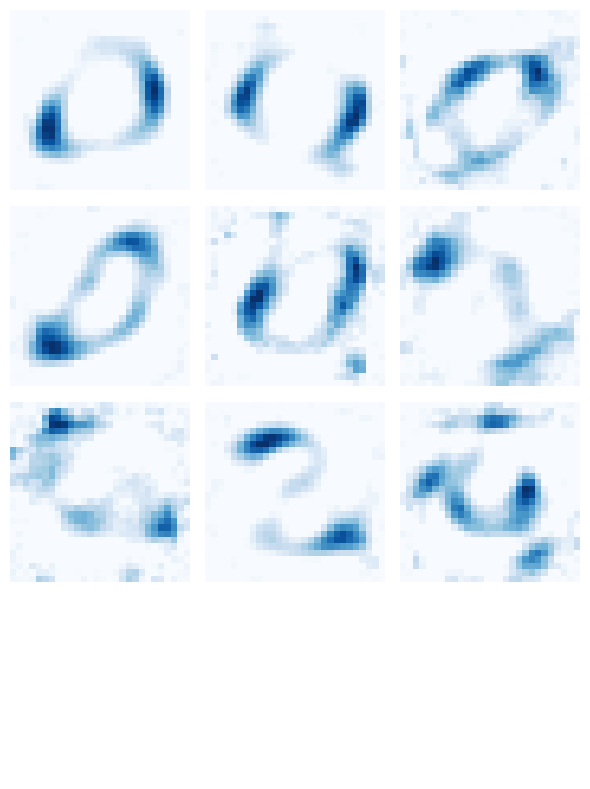

In [143]:
image = np.zeros((n_components, 28, 28))
for i in range(n_components):
    image[i] = W[:, i].reshape(28,28)


images_per_row = int(n_components//(n_components**0.5))
n_rows = int(len(image) // images_per_row + 1)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=images_per_row, figsize=(images_per_row * 2, n_rows * 2))

for i, ax in enumerate(axes.flat):
    if i < n_components:
        # Reshape and display each component as an image
        ax.imshow(image[i], cmap='Blues')  # Use gray scale color map
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide axes for empty subplots

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("./MINIST")

# Display the plot if needed
plt.show()

In [8]:
print(beta.T[0])

[-7.42388641  0.69534533  0.70059088 -0.70063498  1.32042484 -0.89945879
 -1.21426776  2.0151869  -0.92554544]


# Torch Version

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.autograd import Variable

"""
#data = pd.read_csv('../Data/Pancreatic_GSE16515.csv')
data = pd.read_csv('../Data/Breast_GSE70947.csv')

print(data.shape)
y = data['type'].values
y = [1 if y[i] == 'breast_adenocarcinoma' else 0 for i in range(len(y))]
y = np.array(y)
X = data.drop(columns=['samples', 'type']).values
X = (X - np.mean(X, axis = 0))/(100*np.std(X, axis = 0)) # normalization
"""

# hidden_size: 10, 1, 60
hidden_size = 2

Accuracy = []
test_size = 0.5

X_train, X_test, Y_train, Y_test = train_test_split(X, y_matrix.T, test_size=test_size, random_state=2)
# print(X_train.shape)
# print(Y_train.shape)

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(Y_test)).long()
# print(f"y_train's ndim: {y_train.ndim}")
# print(f"y_test: {y_test.shape}")

smf_model = smf(X_train, y_train, hidden_size=hidden_size, device='cuda')
smf_model.fit(num_epochs=500,
               lr_classification=0.01,
               lr_matrix_factorization=0.01,
               xi=1,
               initialize='spectral',
               W_nonnegativity=True,
               H_nonnegativity=True,
               test_data=[X_test, y_test],
               record_recons_error=True)
Accuracy.append(smf_model.test_multi(X_test, y_test))

--- Iteration -1: Training loss --- [Data, Label, Total] = [22269749.043104.3, 2124722194.049203.3, 2146991943.092307.3]
Epoch [10/500],Elapsed_time: 356.67410922050476,Loss_Classification: 1.8800 Loss_MF: 0.8216
mythre= 0.5
Test accuracy = 0.9085777777777778, Test confusion_mx = [[282540    911]
 [ 27887   3662]]
Epoch [20/500],Elapsed_time: 722.1497356891632,Loss_Classification: 1.8800 Loss_MF: 0.8213
mythre= 0.5
Test accuracy = 0.9085777777777778, Test confusion_mx = [[282540    911]
 [ 27887   3662]]
